# Representing Qubit States

You now know something about bits, and about how our familiar digital computers work. All the complex variables, objects and data structures used in modern software are basically all just big piles of bits. Those of us who work on quantum computing call these *classical variables.* The computers that use them, like the one you are using to read this article, we call *classical computers*.

In quantum computers, our basic variable is the _qubit:_ a quantum variant of the bit. These have exactly the same restrictions as normal bits do: they can store only a single binary piece of information, and can only ever give us an output of `0` or `1`. However, they can also be manipulated in ways that can only be described by quantum mechanics. This gives us new gates to play with, allowing us to find new ways to design algorithms.

To fully understand these new gates, we first need to understand how to write down qubit states. For this we will use the mathematics of vectors, matrices, and complex numbers. Though we will introduce these concepts as we go, it would be best if you are comfortable with them already. If you need a more in-depth explanation or a refresher, you can find the guide [here](https://qiskit.org/textbook/ch-appendix/linear_algebra.html).




## Contents

1. [Classical vs Quantum Bits](#cvsq)    
    1.1 [Statevectors](#statevectors)      
    1.2 [Qubit Notation](#notation)    
    1.3 [Exploring Qubits with Qiskit](#exploring-qubits)    
2. [The Rules of Measurement](#rules-measurement)    
    2.1 [A Very Important Rule](#important-rule)    
    2.2 [The Implications of this Rule](#implications)
3. [The Bloch Sphere](#bloch-sphere)    
    3.1 [Describing the Restricted Qubit State](#bloch-sphere-1)     
    3.2 [Visually Representing a Qubit State](#bloch-sphere-2)     


## 1. Classical vs Quantum Bits <a id="cvsq"></a>

### 1.1 Statevectors<a id="statevectors"></a>

In quantum physics we use _statevectors_ to describe the state of our system. Say we wanted to describe the position of a car along a track, this is a classical system so we could use a number $x$:

![tracking a car with scalars](images/car_track_1.jpg)

$$ x=4 $$

Alternatively, we could instead use a collection of numbers in a vector called a  _statevector._ Each element in the statevector contains the probability of finding the car in a certain place:

![tracking a car with vectors](images/car_track_2.jpg)

$$
|x\rangle = \begin{bmatrix} 0\\ \vdots \\ 0 \\ 1 \\ 0 \\ \vdots \\ 0 \end{bmatrix} 
            \begin{matrix} \\  \\  \\ \leftarrow \\  \\  \\  \\ \end{matrix}
             \begin{matrix} \\  \\ \text{Probability of} \\ \text{car being at} \\ \text{position 4} \\  \\  \\ \end{matrix}   
$$

This isn’t limited to position, we could also keep a statevector of all the possible speeds the car could have, and all the possible colours the car could be. With classical systems (like the car example above), this is a silly thing to do as it requires keeping huge vectors when we only really need one number. But as we will see in this chapter, statevectors happen to be a very good way of keeping track of quantum systems, including quantum computers.


### 1.2 Qubit Notation <a id="notation"></a>

Classical bits always have a completely well-defined state: they are either `0` or `1` at every point during a computation. There is no more detail we can add to the state of a bit than this. So to write down the state of a of classical bit (`c`), we can just use these two binary values. For example:

    c = 0

This restriction is lifted for quantum bits. Whether we get a `0` or a `1` from a qubit only needs to be well-defined when a measurement is made to extract an output. At that point, it must commit to one of these two options. At all other times, its state will be something more complex than can be captured by a simple binary value.

To see how to describe these, we can first focus on the two simplest cases. As we saw in the last section, it is possible to prepare a qubit in a state for which it definitely gives the outcome `0` when measured.

We need a name for this state. Let's be unimaginative and call it $0$ . Similarly, there exists a qubit state that is certain to output a `1`. We'll call this $1$. These two states are completely mutually exclusive. Either the qubit definitely outputs a ```0```, or it definitely outputs a ```1```. There is no overlap. One way to represent this with mathematics is to use two orthogonal vectors.

$$
|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix} \, \, \, \, |1\rangle =\begin{bmatrix} 0 \\ 1 \end{bmatrix}.
$$

This is a lot of notation to take in all at once. First, let's unpack the weird $|$ and $\rangle$. Their job is essentially just to remind us that we are talking about the vectors that represent qubit states labelled $0$ and $1$. This helps us distinguish them from things like the bit values ```0``` and ```1``` or the numbers 0 and 1. It is part of the bra-ket notation, introduced by Dirac.

If you are not familiar with vectors, you can essentially just think of them as lists of numbers which we manipulate using certain rules. If you are familiar with vectors from your high school physics classes, you'll know that these rules make vectors well-suited for describing quantities with a magnitude and a direction. For example, the velocity of an object is described perfectly with a vector. However, the way we use vectors for quantum states is slightly different to this, so don't hold on too hard to your previous intuition. It's time to do something new!

With vectors we can describe more complex states than just $|0\rangle$ and $|1\rangle$. For example, consider the vector

$$
|q_0\rangle = \begin{bmatrix} \tfrac{1}{\sqrt{2}} \\ \tfrac{i}{\sqrt{2}} \end{bmatrix} .
$$

To understand what this state means, we'll need to use the mathematical rules for manipulating vectors. Specifically, we'll need to understand how to add vectors together and how to multiply them by scalars.

<p>
 <details>
  <summary>Reminder: Matrix Addition and Multiplication by Scalars (Click here to expand)</summary>
  <p>To add two vectors, we add their elements together:
    $$|a\rangle = \begin{bmatrix}a_0 \\ a_1 \\ \vdots \\ a_n \end{bmatrix}, \quad
    |b\rangle = \begin{bmatrix}b_0 \\ b_1 \\ \vdots \\ b_n \end{bmatrix}$$
    $$|a\rangle + |b\rangle = \begin{bmatrix}a_0 + b_0 \\ a_1 + b_1 \\ \vdots \\ a_n + b_n \end{bmatrix} $$
    </p>
  <p>And to multiply a vector by a scalar, we multiply each element by the scalar:
    $$x|a\rangle = \begin{bmatrix}x \times a_0 \\ x \times  a_1 \\ \vdots \\ x \times  a_n \end{bmatrix}$$
    </p>
  <p>These two rules are used to rewrite the vector $|q_0\rangle$ (as shown above):
      $$
      \begin{aligned} 
      |q_0\rangle & = \tfrac{1}{\sqrt{2}}|0\rangle + \tfrac{i}{\sqrt{2}}|1\rangle \\
                  & = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1\\0\end{bmatrix} + \tfrac{i}{\sqrt{2}}\begin{bmatrix}0\\1\end{bmatrix}\\
                  & = \begin{bmatrix}\tfrac{1}{\sqrt{2}}\\0\end{bmatrix} + \begin{bmatrix}0\\\tfrac{i}{\sqrt{2}}\end{bmatrix}\\
                  & = \begin{bmatrix}\tfrac{1}{\sqrt{2}} \\ \tfrac{i}{\sqrt{2}} \end{bmatrix}\\
      \end{aligned}
      $$
 </details>
</p>
<p>
 <details>
  <summary>Reminder: Orthonormal Bases (Click here to expand)</summary>
  <p>
      It was stated before that the two vectors $|0\rangle$ and $|1\rangle$ are orthonormal, this means they are both <i>orthogonal</i> and <i>normalised</i>. Orthogonal means the vectors are at right angles:
  </p><p><img src="images/basis.svg"></p>
  <p>And normalised means their magnitudes (length of the arrow) is equal to 1. The two vectors $|0\rangle$ and $|1\rangle$ are <i>linearly independent</i>, which means we cannot describe $|0\rangle$ in terms of $|1\rangle$, and vice versa. However, using both the vectors $|0\rangle$ and $|1\rangle$, and our rules of addition and multiplication by scalars, we can describe all possible vectors in 2D space:
    </p><p><img src="images/basis2.svg"></p>
  <p>Because the vectors $|0\rangle$ and $|1\rangle$ are linearly independent, and can be used to describe any vector in 2D space using vector addition and scalar multiplication, we say the vectors $|0\rangle$ and $|1\rangle$ form a <i>basis</i>. In this case, since they are both orthogonal and normalised, we call it an <i>orthonormal basis</i>.
 </details>
</p>

Since the states $|0\rangle$ and $|1\rangle$ form an orthonormal basis, we can represent any 2D vector with a combination of these two states. This allows us to write the state of our qubit in the alternative form:

$$ |q_0\rangle = \tfrac{1}{\sqrt{2}}|0\rangle + \tfrac{i}{\sqrt{2}}|1\rangle $$

This vector, $|q_0\rangle$ is called the qubit's _statevector,_ it tells us everything we could possibly know about this qubit. For now, we are only able to draw a few simple conclusions about this particular example of a statevector: it is not entirely $|0\rangle$ and not entirely $|1\rangle$. Instead, it is described by a linear combination of the two. In quantum mechanics, we typically describe linear combinations such as this using the word 'superposition'.

Though our example state $|q_0\rangle$ can be expressed as a superposition of $|0\rangle$ and $|1\rangle$, it is no less a definite and well-defined qubit state than they are. To see this, we can begin to explore how a qubit can be manipulated.

### 1.3 Exploring Qubits with Qiskit <a id="exploring-qubits"></a>

First, we need to import all the tools we will need:

In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi
from qiskit_aer import Aer
import numpy as np

In Qiskit, we use the `QuantumCircuit` object to store our circuits, this is essentially a list of the quantum operations on our circuit and the qubits they are applied to.

In [2]:
qc = QuantumCircuit(1) # Create a quantum circuit with one qubit

In our quantum circuits, our qubits always start out in the state $|0\rangle$. We can use the `initialize()` method to transform this into any state. We give `initialize()` the vector we want in the form of a list, and tell it which qubit(s) we want to initialize in this state:

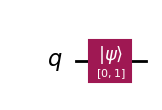

In [3]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw('mpl')  # Let's view our circuit

We can then use one of Qiskit’s simulators to view the resulting state of our qubit.

In [4]:
sim = AerSimulator()  # Tell Qiskit how to simulate our circuit

To get the results from our circuit, we use `run` to execute our circuit, giving the circuit and the backend as arguments. We then use `.result()` to get the result of this:

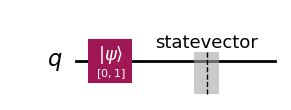

In [5]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.save_statevector()   # Tell simulator to save statevector
result = sim.run(qc, shots = 2048).result() # Do the simulation and return the result for 2048 shots (1024 by default)
qc.draw('mpl')  # Let's view our circuit

from `result`, we can then get the final statevector using `.get_statevector()`:

In [6]:
out_state = result.get_statevector()
print(out_state) # Display the output state vector

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


**Note:** Python uses `j` to represent $i$ in complex numbers. We see a vector with two complex elements: `0.+0.j` = 0, and `1.+0.j` = 1.

Let’s now measure our qubit as we would in a real quantum computer and see the result:

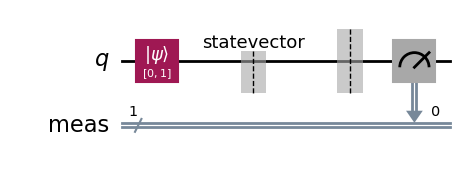

In [7]:
qc.measure_all()
qc.draw('mpl')

This time, instead of the statevector we will get the counts for the `0` and `1` results using `.get_counts()`:

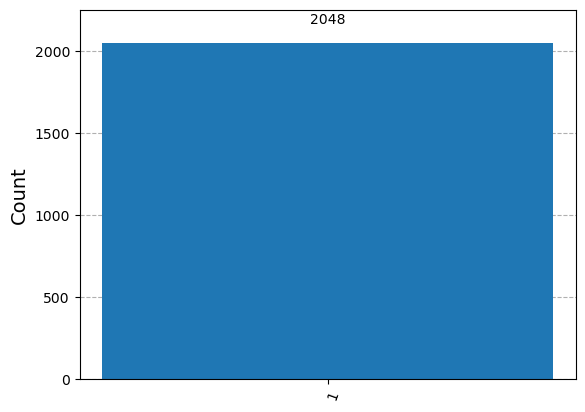

In [8]:
result = sim.run(qc, shots = 2048).result()
counts = result.get_counts()
plot_histogram(counts)

We can see that we (unsurprisingly) have a 100% chance of measuring $|1\rangle$. This time, let’s instead put our qubit into a superposition and see what happens. We will use the state $|q_0\rangle$ from earlier in this section:

$$ |q_0\rangle = \tfrac{1}{\sqrt{2}}|0\rangle + \tfrac{i}{\sqrt{2}}|1\rangle $$

We need to add these amplitudes to a python list. To add a complex amplitude, Python uses `j` for the imaginary unit (we normally call it "$i$" mathematically):

In [9]:
initial_state = [1/sqrt(2), 1j/sqrt(2)]  # Define state |q_0>

And we then repeat the steps for initialising the qubit as before:

In [10]:
qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialize the 0th qubit in the state `initial_state`
qc.save_statevector() # Save statevector
state = sim.run(qc).result().get_statevector() # Execute the circuit
print(state)           # Print the result

Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


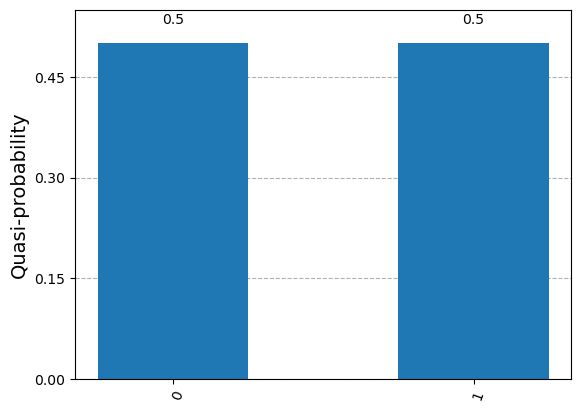

In [11]:
results = sim.run(qc).result().get_counts()
plot_histogram(results)

We can see we have equal probability of measuring either $|0\rangle$ or $|1\rangle$. To explain this, we need to talk about measurement.

## 2. The Rules of Measurement <a id="rules-measurement"></a>
### 2.1 A Very Important Rule <a id="important-rule"></a>

There is a simple rule for measurement. To find the probability of measuring a state $|\psi \rangle$ in the state $|x\rangle$ we do:

$$p(|x\rangle) = | \langle x| \psi \rangle|^2$$

The symbols $\langle$ and $|$ tell us $\langle x |$ is a row vector and the symbols $|$ and $\rangle$ tell us $|\psi\rangle$ is a column vector. In quantum mechanics we call the column vectors _kets_ and the row vectors _bras._ Together they make up _bra-ket_ notation. Any ket $|a\rangle$ has a corresponding bra $\langle a|$, and we convert between them using the conjugate transpose.
<details>
    <summary>Reminder: Conjugate Transpose (Click here to expand)</summary>
    <p>Conversion between bra-ket takes places using the <i>conjugate transpose</i> method. We know a ket (column vector) is represented as follows:
        $$\quad|a\rangle = \begin{bmatrix}a_0 \\ a_1 \\ \vdots \\ a_n \end{bmatrix}$$
    </p>
    <p>
In conjugate transpose method, the matrix is transposed and the elements are complex conjugated (represented by the "$*$" operation) where complex conjugate ("$*$") of a complex number is a number with an equal real part and an imaginary part equal in magnitude but opposite in sign. This gives the coressponding bra (row vector) as follows:
        $$\langle a| = \begin{bmatrix}a_0^*, & a_1^*, & \dots & a_n^* \end{bmatrix}$$
    </p>
</details>   

<details>
  <summary>Reminder: The Inner Product (Click here to expand)</summary>
    <p>There are different ways to multiply vectors, here we use the <i>inner product</i>. The inner product is a generalisation of the <i>dot product</i> which you may already be familiar with. In this guide, we use the inner product between a bra (row vector) and a ket (column vector), and it follows this rule:
        
$$\langle a| = \begin{bmatrix}a_0^*, & a_1^*, & \dots & a_n^* \end{bmatrix}, \quad
    |b\rangle = \begin{bmatrix}b_0 \\ b_1 \\ \vdots \\ b_n \end{bmatrix}$$
    $$\langle a|b\rangle = a_0^* b_0 + a_1^* b_1 \dots a_n^* b_n$$
    </p>
  <p>We can see that the inner product of two vectors always gives us a scalar. A useful thing to remember is that the inner product of two orthogonal vectors is 0, for example if we have the orthogonal vectors $|0\rangle$ and $|1\rangle$:
    $$\langle1|0\rangle = \begin{bmatrix} 0 & 1\end{bmatrix}\begin{bmatrix}1 \\ 0\end{bmatrix} = 0$$
    </p>
  <p>Additionally, remember that the vectors $|0\rangle$ and $|1\rangle$ are also normalised (magnitudes are equal to 1):
    
$$
      \begin{aligned} 
      \langle0|0\rangle & = \begin{bmatrix} 1 & 0\end{bmatrix}\begin{bmatrix}1 \\ 0\end{bmatrix} = 1 \\
      \langle1|1\rangle & = \begin{bmatrix} 0 & 1\end{bmatrix}\begin{bmatrix}0 \\ 1\end{bmatrix} = 1
      \end{aligned}
$$
   </p>
</details>

         
In the equation above, $|x\rangle$ can be any qubit state. To find the probability of measuring $|x\rangle$, we take the inner product of $|x\rangle$ and the state we are measuring (in this case $|\psi\rangle$), then square the magnitude. This may seem a little convoluted, but it will soon become second nature.

If we look at the state $|q_0\rangle$ from before, we can see the probability of measuring $|0\rangle$ is indeed $0.5$:

$$
\begin{aligned}
|q_0\rangle & = \tfrac{1}{\sqrt{2}}|0\rangle + \tfrac{i}{\sqrt{2}}|1\rangle \\
\langle 0| q_0 \rangle  & = \tfrac{1}{\sqrt{2}}\langle 0|0\rangle + \tfrac{i}{\sqrt{2}}\langle 0|1\rangle \\
& = \tfrac{1}{\sqrt{2}}\cdot 1 +  \tfrac{i}{\sqrt{2}} \cdot 0\\
& = \tfrac{1}{\sqrt{2}}\\
|\langle 0| q_0 \rangle|^2 & = \tfrac{1}{2}
\end{aligned}
$$

You should verify the probability of measuring $|1\rangle$ as an exercise.

This rule governs how we get information out of quantum states. It is therefore very important for everything we do in quantum computation. It also immediately implies several important facts.

### 2.2 The Implications of this Rule <a id="implications"></a>
### #1 Normalisation

The rule shows us that amplitudes are related to probabilities. If we want the probabilities to add up to 1 (which they should!), we need to ensure that the statevector is properly normalized. Specifically, we need the magnitude of the state vector to be 1.

$$ \langle\psi|\psi\rangle = 1 \\ $$

Thus if:

$$ |\psi\rangle = \alpha|0\rangle + \beta|1\rangle $$

Then:

$$ |\alpha|^2 + |\beta|^2 = 1 $$

This explains the factors of $\sqrt{2}$ you have seen throughout this chapter. In fact, if we try to give `initialize()` a vector that isn’t normalised, it will give us an error:

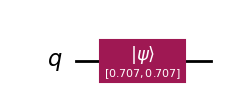

In [12]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
vector = np.array([1.0,1.0]) / np.sqrt(2) 
qc.initialize(vector, 0)
qc.draw('mpl')  # Let's view our circuit

#### Quick Exercise
1. Create a state vector that will give a $1/3$ probability of measuring $|0\rangle$.
2. Create a different state vector that will give the same measurement probabilities.
3. Verify that the probability of measuring $|1\rangle$ for these two states is $2/3$.

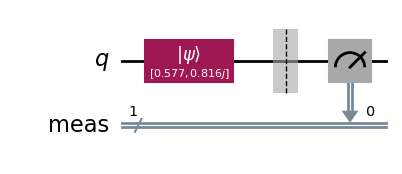

Probability for 0: 0.33076
Probability for 1: 0.66924


In [13]:
# First state vector that gives a 1/3 probability of measuring |0>
initial_state = [1/sqrt(3), sqrt(2)*1j/sqrt(3)]
qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialize the 0th qubit in the state `initial_state`
qc.measure_all()
display(qc.draw('mpl'))  # Let's view our circuit

# Probability to get the different states
results = sim.run(qc, shots = 100000).result().get_counts()
print('Probability for 0: ' + str(results['0']/100000))
print('Probability for 1: ' + str(results['1']/100000))

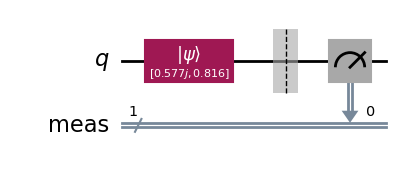

Probability for 0: 0.33389
Probability for 1: 0.66611


In [14]:
# Second state vector that gives a 1/3 probability of measuring |0>
initial_state2 = [1j/sqrt(3), sqrt(2)/sqrt(3)]
qc2 = QuantumCircuit(1) # Must redefine qc
qc2.initialize(initial_state2, 0) # Initialize the 0th qubit in the state `initial_state`
qc2.measure_all()
display(qc2.draw('mpl'))  # Let's view our circuit

# Probability to get the different states
results = sim.run(qc2, shots = 100000).result().get_counts()
print('Probability for 0: ' + str(results['0']/100000))
print('Probability for 1: ' + str(results['1']/100000))

### #2 Alternative measurement

The measurement rule gives us the probability $p(|x\rangle)$ that a state $|\psi\rangle$ is measured as $|x\rangle$. Nowhere does it tell us that $|x\rangle$ can only be either $|0\rangle$ or $|1\rangle$.

The measurements we have considered so far are in fact only one of an infinite number of possible ways to measure a qubit. For any orthogonal pair of states, we can define a measurement that would cause a qubit to choose between the two.

This possibility will be explored more in the next section. For now, just bear in mind that $|x\rangle$ is not limited to being simply $|0\rangle$ or $|1\rangle$.

### #3 Global Phase

We know that measuring the state $|1\rangle$ will give us the output `1` with certainty. But we are also able to write down states such as 

$$\begin{bmatrix}0 \\ i\end{bmatrix} = i|1\rangle.$$

To see how this behaves, we apply the measurement rule.

$$ |\langle x| (i|1\rangle) |^2 = | i \langle x|1\rangle|^2 = |\langle x|1\rangle|^2 $$

Here we find that the factor of $i$ disappears once we take the magnitude of the complex number. This effect is completely independent of the measured state $|x\rangle$. It does not matter what measurement we are considering, the probabilities for the state $i|1\rangle$ are identical to those for $|1\rangle$. Since measurements are the only way we can extract any information from a qubit, this implies that these two states are equivalent in all ways that are physically relevant.

More generally, we refer to any overall factor $\gamma$ on a state for which $|\gamma|=1$ as a 'global phase'. States that differ only by a global phase are physically indistinguishable.

$$ |\langle x| ( \gamma |a\rangle) |^2 = | \gamma \langle x|a\rangle|^2 = |\langle x|a\rangle|^2 $$

Note that this is distinct from the phase difference _between_ terms in a superposition, which is known as the 'relative phase'. This becomes relevant once we consider different types of measurement and multiple qubits.


### #4 The Observer Effect

We know that the amplitudes contain information about the probability of us finding the qubit in a specific state, but once we have measured the qubit, we know with certainty what the state of the qubit is. For example, if we measure a qubit in the state:

$$ |q\rangle = \alpha|0\rangle + \beta|1\rangle$$

And find it in the state $|0\rangle$, if we measure again, there is a 100% chance of finding the qubit in the state $|0\rangle$. This means the act of measuring _changes_ the state of our qubits.

$$ |q\rangle = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} \xrightarrow{\text{Measure }|0\rangle} |q\rangle = |0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$$

We sometimes refer to this as _collapsing_ the state of the qubit. It is a potent effect, and so one that must be used wisely. For example, were we to constantly measure each of our qubits to keep track of their value at each point in a computation, they would always simply be in a well-defined state of either $|0\rangle$ or $|1\rangle$. As such, they would be no different from classical bits and our computation could be easily replaced by a classical computation. To achieve truly quantum computation we must allow the qubits to explore more complex states. Measurements are therefore only used when we need to extract an output. This means that we often place all the measurements at the end of our quantum circuit. 

We can demonstrate this using Qiskit’s statevector simulator. Let's initialize a qubit in superposition:

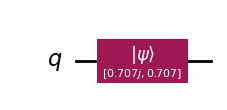

In [15]:
qc = QuantumCircuit(1) # We are redefining qc
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc.initialize(initial_state, 0)
qc.draw('mpl')

This should initialize our qubit in the state:

$$ |q\rangle = \tfrac{i}{\sqrt{2}}|0\rangle + \tfrac{1}{\sqrt{2}}|1\rangle $$

We can verify this using the simulator:

In [16]:
qc.save_statevector()
result = sim.run(qc).result()
state = result.get_statevector()
print("Qubit State = " + str(state))

Qubit State = Statevector([0.        +0.70710678j, 0.70710678+0.j        ],
            dims=(2,))


We can see here the qubit is initialized in the state `[0.+0.70710678j 0.70710678+0.j]`, which is the state we expected.

Let’s now create a circuit where we measure this qubit:

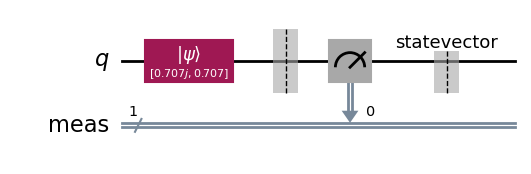

In [17]:
qc = QuantumCircuit(1) # We are redefining qc
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc.initialize(initial_state, 0)
qc.measure_all()
qc.save_statevector()
qc.draw('mpl')

When we simulate this entire circuit, we can see that one of the amplitudes is _always_ 0:

In [18]:
state = sim.run(qc).result().get_statevector()
print("State of Measured Qubit = " + str(state))

State of Measured Qubit = Statevector([0.+1.j, 0.+0.j],
            dims=(2,))


You can re-run this cell a few times to reinitialize the qubit and measure it again. You will notice that either outcome is equally probable, but that the state of the qubit is never a superposition of $|0\rangle$ and $|1\rangle$. Somewhat interestingly, the global phase on the state $|0\rangle$ survives, but since this is global phase, we can never measure it on a real quantum computer.

### A Note about Quantum Simulators

We can see that writing down a qubit’s state requires keeping track of two complex numbers, but when using a real quantum computer we will only ever receive a yes-or-no (`0` or `1`) answer for each qubit. The output of a 10-qubit quantum computer will look like this:

`0110111110`

Just 10 bits, no superposition or complex amplitudes. When using a real quantum computer, we cannot see the states of our qubits mid-computation, as this would destroy them! This behaviour is not ideal for learning, so Qiskit provides different quantum simulators: By default, the `aer_simulator` mimics the execution of a real quantum computer, but will also allow you to peek at quantum states before measurement if we include certain instructions in our circuit. For example, here we have included the instruction `.save_statevector()`, which means we can use `.get_statevector()` on the result of the simulation. 




## 3. The Bloch Sphere <a id="bloch-sphere"></a>
### 3.1 Describing the Restricted Qubit State <a id="bloch-sphere-1"></a>

We saw earlier in this chapter that the general state of a qubit ($|q\rangle$) is:

$$
|q\rangle = \alpha|0\rangle + \beta|1\rangle
$$

$$
\alpha, \beta \in \mathbb{C}
$$

(The second line tells us $\alpha$ and $\beta$ are complex numbers). The first two implications in section 2 tell us that we cannot differentiate between some of these states. This means we can be more specific in our description of the qubit. 

Firstly, since we cannot measure global phase, we can only measure the difference in phase between the states $|0\rangle$ and $|1\rangle$. Instead of having $\alpha$ and $\beta$ be complex, we can confine them to the real numbers and add a term to tell us the relative phase between them:

$$
|q\rangle = \alpha|0\rangle + e^{i\phi}\beta|1\rangle
$$

$$
\alpha, \beta, \phi \in \mathbb{R}
$$

Finally, since the qubit state must be normalised, i.e.

$$
\sqrt{\alpha^2 + \beta^2} = 1
$$

we can use the trigonometric identity:

$$
\sqrt{\sin^2{x} + \cos^2{x}} = 1
$$

to describe the real $\alpha$ and $\beta$ in terms of one variable, $\theta$:

$$
\alpha = \cos{\tfrac{\theta}{2}}, \quad \beta=\sin{\tfrac{\theta}{2}}
$$

From this we can describe the state of any qubit using the two variables $\phi$ and $\theta$:

$$
|q\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle
$$

$$
\theta, \phi \in \mathbb{R}
$$

### 3.2 Visually Representing a Qubit State <a id="bloch-sphere-2"></a>

We want to plot our general qubit state:

$$
|q\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle
$$

If we interpret $\theta$ and $\phi$ as spherical co-ordinates ($r = 1$, since the magnitude of the qubit state is $1$), we can plot any single qubit state on the surface of a sphere, known as the _Bloch sphere._

Below we have plotted a qubit in the state $|{+}\rangle$. In this case, $\theta = \pi/2$ and $\phi = 0$.

Qiskit has a function to plot a Bloch sphere, `plot_bloch_vector()`. This function accepts cartesian coordinates by default, but can also accept spherical coordinates by passing the argument `coord_type='spherical'.`


You can also try [this interactive Bloch sphere demo](https://javafxpert.github.io/grok-bloch/).


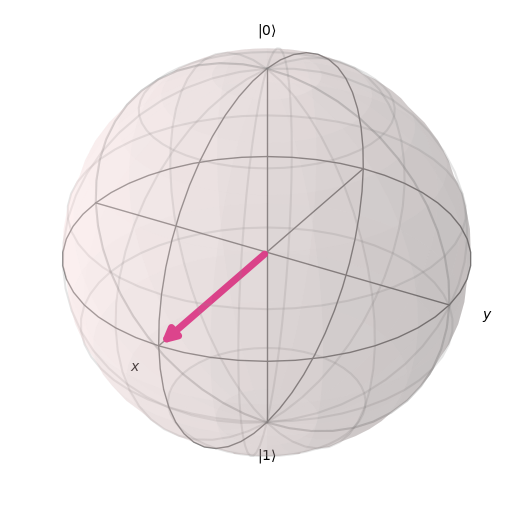

In [19]:
from qiskit.visualization import plot_bloch_vector
coords = [1,pi/2,0]  # [Radius, Theta, Phi]
plot_bloch_vector(coords, coord_type='spherical')

#### Warning!
When first learning about qubit states, it's easy to confuse the qubits _statevector_ with its _Bloch vector_. Remember the statevector is the vector discussed in [1.1](#notation), that holds the amplitudes for the two states our qubit can be in. The Bloch vector is a visualisation tool that maps the 2D, complex statevector onto real, 3D space.

#### Quick Exercise
Use `plot_bloch_vector()` to plot a qubit in the states:
1. $|0\rangle$
2. $|1\rangle$
3. $\tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$
4. $\tfrac{1}{\sqrt{2}}(|0\rangle - i|1\rangle)$
5. $\tfrac{1}{\sqrt{2}}\begin{bmatrix}i\\1\end{bmatrix}$

# 

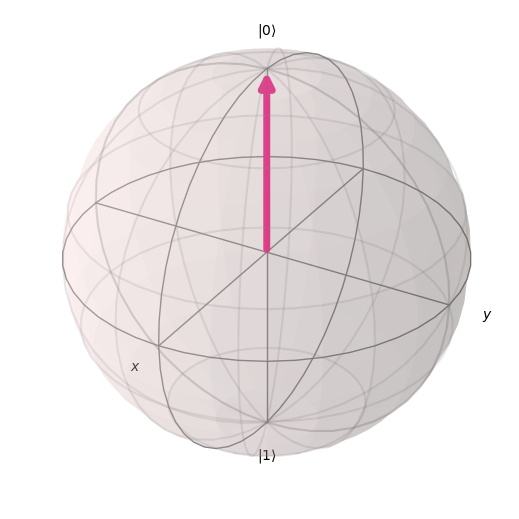

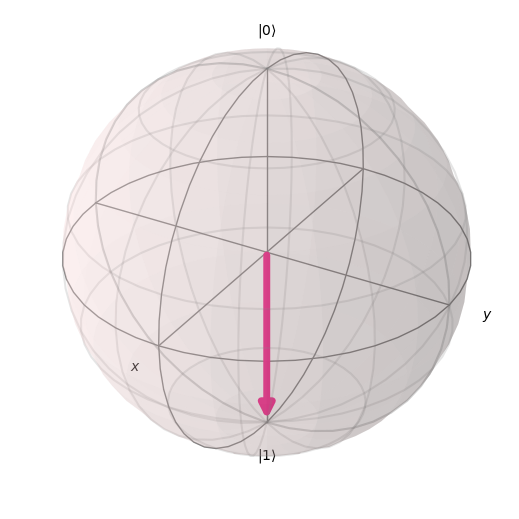

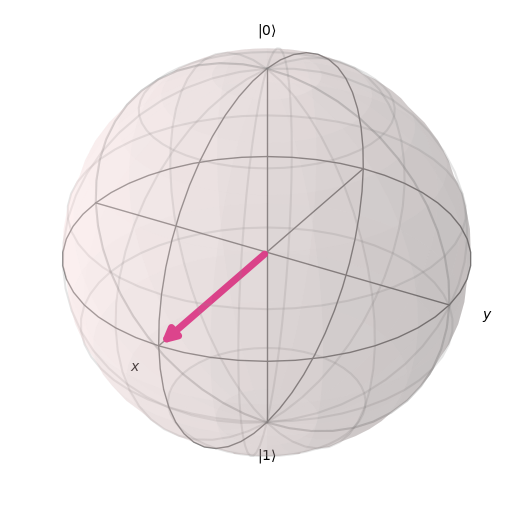

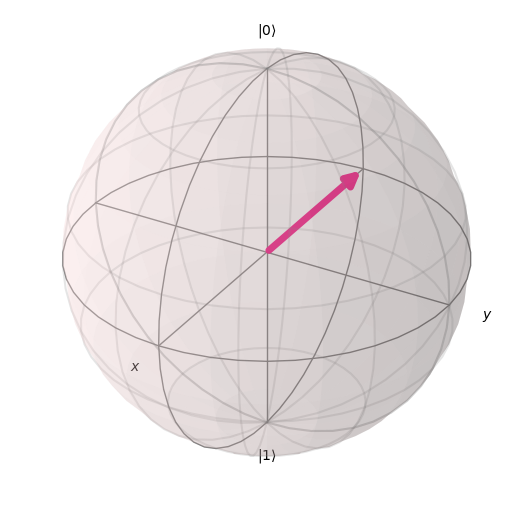

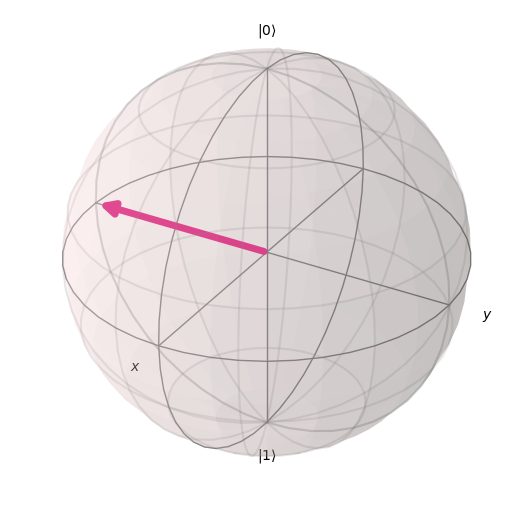

In [20]:

from qiskit.visualization import plot_bloch_multivector

# [Radius, Theta, Phi]
coords_1 = [1,0,0]
coords_2 = [1,pi,0]
coords_3 = [1,pi/2,0]
coords_4 = [1,pi/2,pi]
coords_5 = [1,pi/2,-pi/2]

display(plot_bloch_vector(coords_1, coord_type='spherical'))
display(plot_bloch_vector(coords_2, coord_type='spherical'))
display(plot_bloch_vector(coords_3, coord_type='spherical'))
display(plot_bloch_vector(coords_4, coord_type='spherical'))
display(plot_bloch_vector(coords_5, coord_type='spherical'))

# Single Qubit Gates

In the previous section we looked at all the possible states a qubit could be in. We saw that qubits could be represented by 2D vectors, and that their states are limited to the form:

$$ |q\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle $$

Where $\theta$ and $\phi$ are real numbers. In this section we will cover _gates,_ the operations that change a qubit between these states. Due to the number of gates and the similarities between them, this chapter is at risk of becoming a list. To counter this, we have included a few digressions to introduce important ideas at appropriate places throughout the chapter. 

## Contents    

1. [The Pauli Gates](#pauli)    
    1.1 [The X-Gate](#xgate)    
    1.2 [The Y & Z-Gates](#ynzgatez)    
2. [Digression: The X, Y & Z-Bases](#xyzbases)    
3. [The Hadamard Gate](#hgate)    
4. [Digression: Measuring in Different Bases](#measuring)    
5. [The P-gate](#rzgate)    
6. [The I, S and T-gates](#istgates)    
    6.1 [The I-Gate](#igate)    
    6.2 [The S-Gate](#sgate)    
    6.3 [The T-Gate](#tgate)    
7. [The General U-gate](#generalU)    

In _The Atoms of Computation_ we came across some gates and used them to perform a classical computation. An important feature of quantum circuits is that, between initialising the qubits and measuring them, the operations (gates) are *_always_* reversible! These reversible gates can be represented as matrices, and as rotations around the Bloch sphere. 

In [21]:
from qiskit.visualization import plot_bloch_multivector

## 1. The Pauli Gates <a id="pauli"></a>
You should be familiar with the Pauli matrices from the linear algebra section. If any of the maths here is new to you, you should use the linear algebra section to bring yourself up to speed. We will see here that the Pauli matrices can represent some very commonly used quantum gates.

### 1.1 The X-Gate <a id="xgate"></a>
The X-gate is represented by the Pauli-X matrix:

$$ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = |0\rangle\langle1| + |1\rangle\langle0| $$

To see the effect a gate has on a qubit, we simply multiply the qubit’s statevector by the gate. We can see that the X-gate switches the amplitudes of the states $|0\rangle$ and $|1\rangle$:

$$ X|0\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1\rangle$$





<!--- Beware editing things inside <details> tags as it easily breaks when the notebook is converted to html --->
<details>
 <summary>Reminder: Multiplying Vectors by Matrices (Click here to expand)</summary>
  <p>Matrix multiplication is a generalisation of the inner product we saw in the last chapter. In the specific case of multiplying a vector by a matrix (as seen above), we always get a vector back:
  $$ M|v\rangle  = \begin{bmatrix}a & b \\ c & d \\\end{bmatrix}\begin{bmatrix}v_0 \\ v_1 \\\end{bmatrix}
                = \begin{bmatrix}a\cdot v_0 + b \cdot v_1 \\ c \cdot v_0 + d \cdot v_1\end{bmatrix} $$
  In quantum computing, we can write our matrices in terms of basis vectors:
  $$X = |0\rangle\langle1| + |1\rangle\langle0|$$
  This can sometimes be clearer than using a box matrix as we can see what different multiplications will result in:
  $$
      \begin{aligned}
      X|1\rangle & = (|0\rangle\langle1| + |1\rangle\langle0|)|1\rangle \\
                 & = |0\rangle\langle1|1\rangle + |1\rangle\langle0|1\rangle \\
                 & = |0\rangle \times 1 + |1\rangle \times 0 \\
                 & = |0\rangle
      \end{aligned}
  $$
  In fact, when we see a ket and a bra multiplied like this:
  $$ |a\rangle\langle b| $$
  this is called the <i>outer product</i>, which follows the rule:
  $$
      |a\rangle\langle b| = 
      \begin{bmatrix}
              a_0 b_0^* & a_0 b_1^* & \dots  & a_0 b_n^*\\ 
              a_1 b_0^* & \ddots  &        & \vdots \\
              \vdots  &         & \ddots & \vdots \\
              a_n b_0^* & \dots   & \dots  & a_n b_n^* \\
      \end{bmatrix}
  $$
  where $*$ denotes the complex conjugation. We can see this does indeed result in the X-matrix as seen above:
  $$
      |0\rangle\langle1| + |1\rangle\langle0| = 
      \begin{bmatrix}0 & 1 \\ 0 & 0 \\\end{bmatrix} +
      \begin{bmatrix}0 & 0 \\ 1 & 0 \\\end{bmatrix} = 
      \begin{bmatrix}0 & 1 \\ 1 & 0 \\\end{bmatrix} = X
  $$
</details>

In Qiskit, we can create a short circuit to verify this:

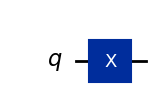

In [22]:
# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')

Let's see the result of the above circuit. **Note:** Here we use `plot_bloch_multivector()` which takes a qubit's statevector instead of the Bloch vector.

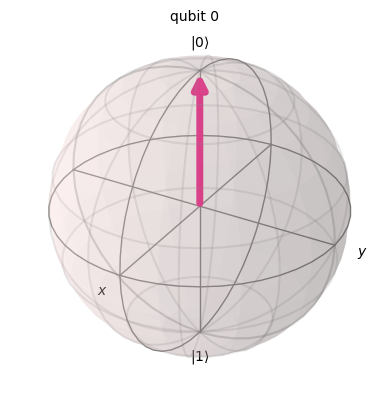

In [23]:
# Extract the unitary vector from the circuit and plot its state vector

#plot example
state = np.array([1,0])##
plot_bloch_multivector(state)

We can indeed see the state of the qubit is $|1\rangle$ as expected. We can think of this as a rotation by $\pi$ radians around the *x-axis* of the Bloch sphere. The X-gate is also often called a NOT-gate, referring to its classical analogue.

### 1.2 The Y & Z-gates  <a id="ynzgatez"></a>
Similarly to the X-gate, the Y & Z Pauli matrices also act as the Y & Z-gates in our quantum circuits:


$$ Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} \quad\quad\quad\quad Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} $$

$$ Y = -i|0\rangle\langle1| + i|1\rangle\langle0| \quad\quad Z = |0\rangle\langle0| - |1\rangle\langle1| $$

And, unsurprisingly, they also respectively perform rotations by $\pi$ around the y and z-axis of the Bloch sphere.



In Qiskit, we can apply the Y and Z-gates to our circuit using:

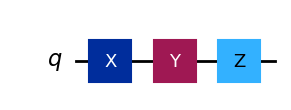

In [24]:
qc.y(0) # Do Y-gate on qubit 0
qc.z(0) # Do Z-gate on qubit 0
qc.draw('mpl')

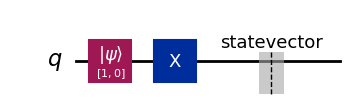

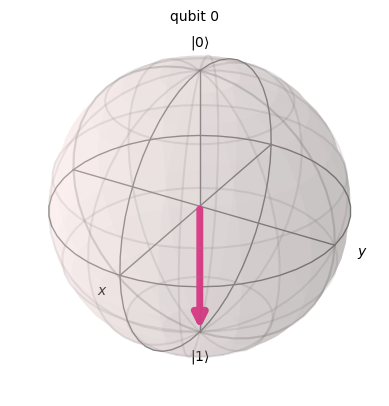

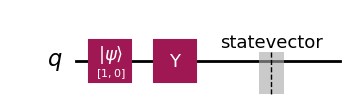

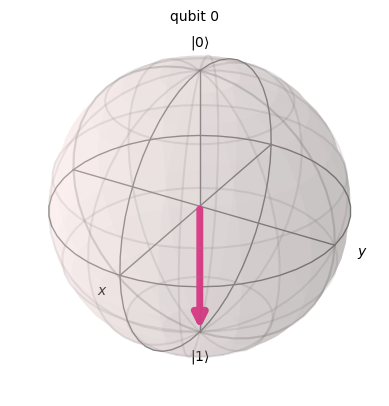

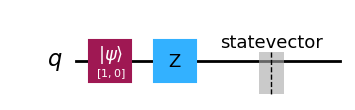

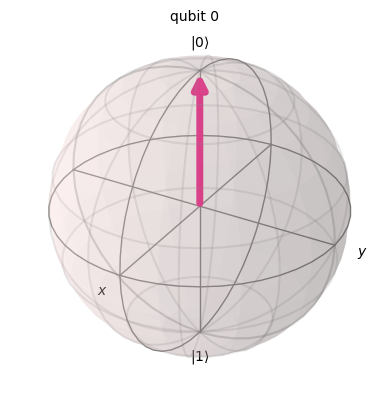

In [25]:
# Exercise 
# Plot the state vector of the qubit after applying the X, Y, and Z gates respectively
qc_x = QuantumCircuit(1)
qc_x.initialize(state, 0)
qc_x.x(0)
qc_x.save_statevector()   # Tell simulator to save statevector
display(qc_x.draw('mpl'))
state_x = sim.run(qc_x).result().get_statevector()
display(plot_bloch_multivector(state_x))

qc_y = QuantumCircuit(1)
qc_y.initialize(state, 0)
qc_y.y(0)
qc_y.save_statevector()   # Tell simulator to save statevector
display(qc_y.draw('mpl'))
state_y = sim.run(qc_y).result().get_statevector()
display(plot_bloch_multivector(state_y))

qc_z = QuantumCircuit(1)
qc_z.initialize(state, 0)
qc_z.z(0)
qc_z.save_statevector()   # Tell simulator to save statevector
display(qc_z.draw('mpl'))
state_z = sim.run(qc_z).result().get_statevector()
display(plot_bloch_multivector(state_z))

## 2. Digression: The X, Y & Z-Bases <a id="xyzbases"></a>

<details>
  <summary>Reminder: Eigenvectors of Matrices (Click here to expand)</summary>
We have seen that multiplying a vector by a matrix results in a vector:
     
$$
    M|v\rangle  = |v'\rangle \leftarrow \text{new vector}
    $$
If we chose the right vectors and matrices, we can find a case in which this matrix multiplication is the same as doing a multiplication by a scalar:
      
$$
    M|v\rangle  = \lambda|v\rangle
    $$
(Above, $M$ is a matrix, and $\lambda$ is a scalar). For a matrix $M$, any vector that has this property is called an <i>eigenvector</i> of $M$. For example, the eigenvectors of the Z-matrix are the states $|0\rangle$ and $|1\rangle$:

$$
      \begin{aligned}
      Z|0\rangle & = |0\rangle \\
      Z|1\rangle & = -|1\rangle
      \end{aligned}
      $$
Since we use vectors to describe the state of our qubits, we often call these vectors <i>eigenstates</i> in this context. Eigenvectors are very important in quantum computing, and it is important you have a solid grasp of them.
</details>

You may also notice that the Z-gate appears to have no effect on our qubit when it is in either of these two states. This is because the states $|0\rangle$ and $|1\rangle$ are the two _eigenstates_ of the Z-gate. In fact, the _computational basis_ (the basis formed by the states $|0\rangle$ and $|1\rangle$) is often called the Z-basis. This is not the only basis we can use, a popular basis is the X-basis, formed by the eigenstates of the X-gate. We call these two vectors $|+\rangle$ and $|-\rangle$:

$$ |+\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle) = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1 \end{bmatrix}$$

$$ |-\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle) = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -1 \end{bmatrix} $$

Another less commonly used basis is that formed by the eigenstates of the Y-gate. These are called:

$$ |\circlearrowleft\rangle, \quad |\circlearrowright\rangle$$

We leave it as an exercise to calculate these. There are in fact an infinite number of bases; to form one, we simply need two orthogonal vectors. The eigenvectors of both Hermitian and unitary matrices form a basis for the vector space. Due to this property, we can be sure that the eigenstates of the X-gate and the Y-gate indeed form a basis for 1-qubit states (read more about this in the [linear algebra page](https://qiskit.org/textbook/ch-appendix/linear_algebra.html#Matrices-and-Matrix-Operations) in the appendix)

### Quick Exercises
1. Verify that $|+\rangle$ and $|-\rangle$ are in fact eigenstates of the X-gate.
2. What eigenvalues do they have? 
3. Find the eigenstates of the Y-gate, and their co-ordinates on the Bloch sphere.

Using only the Pauli-gates it is impossible to move our initialized qubit to any state other than $|0\rangle$ or $|1\rangle$, i.e. we cannot achieve superposition. This means we can see no behaviour different to that of a classical bit. To create more interesting states we will need more gates!

## 3. The Hadamard Gate  <a id="hgate"></a>

The Hadamard gate (H-gate) is a fundamental quantum gate. It allows us to move away from the poles of the Bloch sphere and create a superposition of $|0\rangle$ and $|1\rangle$. It has the matrix:

$$ H = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} $$

We can see that this performs the transformations below:

$$ H|0\rangle = |+\rangle $$

$$ H|1\rangle = |-\rangle $$

This can be thought of as a rotation around the Bloch vector `[1,0,1]` (the line between the x & z-axis), or as transforming the state of the qubit between the X and Z bases.


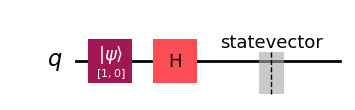

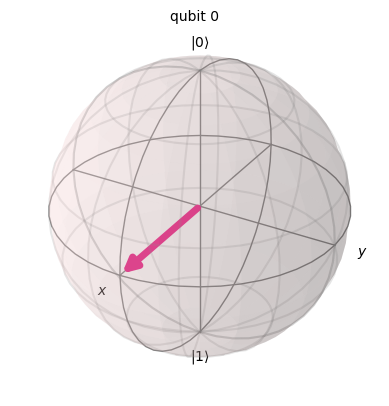

In [52]:
# Exercise: Plot the state vector of the qubit after applying the H gate
qc_h = QuantumCircuit(1)
qc_h.initialize(state, 0)
qc_h.h(0)
qc_h.save_statevector()   # Tell simulator to save statevector
display(qc_h.draw('mpl'))
state_h = sim.run(qc_h).result().get_statevector()
display(plot_bloch_multivector(state_h))

### Quick Exercise
1. Write the H-gate as the outer products of vectors $|0\rangle$, $|1\rangle$, $|+\rangle$ and $|-\rangle$.
2. Show that applying the sequence of gates: HZH, to any qubit state is equivalent to applying an X-gate.
3. Find a combination of X, Z and H-gates that is equivalent to a Y-gate (ignoring global phase).





## 4. Digression: Measuring in Different Bases  <a id="measuring"></a>
We have seen that the Z-basis is not intrinsically special, and that there are infinitely many other bases. Similarly with measurement, we don’t always have to measure in the computational basis (the Z-basis), we can measure our qubits in any basis.

As an example, let’s try measuring in the X-basis. We can calculate the probability of measuring either $|+\rangle$ or $|-\rangle$:

$$ p(|+\rangle) = |\langle+|q\rangle|^2, \quad p(|-\rangle) = |\langle-|q\rangle|^2 $$

And after measurement, the superposition is destroyed. Since Qiskit only allows measuring in the Z-basis, we must create our own using Hadamard gates:

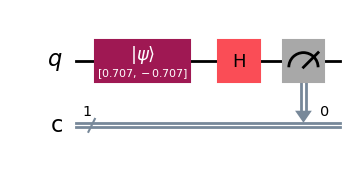

In [75]:
# Create the X-measurement function:
def x_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    return qc

initial_state = [1/sqrt(2), -1/sqrt(2)]
# Initialize our qubit and measure it
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
x_measurement(qc, 0, 0)  # measure qubit 0 to classical bit 0
qc.draw('mpl')

In the quick exercises above, we saw you could create an X-gate by sandwiching our Z-gate between two H-gates:

$$ X = HZH $$

Starting in the Z-basis, the H-gate switches our qubit to the X-basis, the Z-gate performs a NOT in the X-basis, and the final H-gate returns our qubit to the Z-basis. We can verify this always behaves like an X-gate by multiplying the matrices:

$$
HZH =
\tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
\tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
=
\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
=X
$$

Following the same logic, we have created an X-measurement by transforming from the X-basis to the Z-basis before our measurement. Since the process of measuring can have different effects depending on the system (e.g. some systems always return the qubit to $|0\rangle$ after measurement, whereas others may leave it as the measured state), the state of the qubit post-measurement is undefined and we must reset it if we want to use it again.

There is another way to see why the Hadamard gate indeed takes us from the Z-basis to the X-basis. Suppose the qubit we want to measure in the X-basis is in the (normalized) state $a |0\rangle + b |1\rangle$. To measure it in X-basis, we first express the state as a linear combination of $|+\rangle$ and $|-\rangle$. Using the relations $|0\rangle = \frac{|+\rangle + |-\rangle}{\sqrt{2}}$ and $|1\rangle = \frac{|+\rangle - |-\rangle}{\sqrt{2}}$, the state becomes $\frac{a + b}{\sqrt{2}}|+\rangle + \frac{a - b}{\sqrt{2}}|-\rangle$. Observe that the probability amplitudes in X-basis can be obtained by applying a Hadamard matrix on the state vector expressed in Z-basis.

Let’s now see the results:

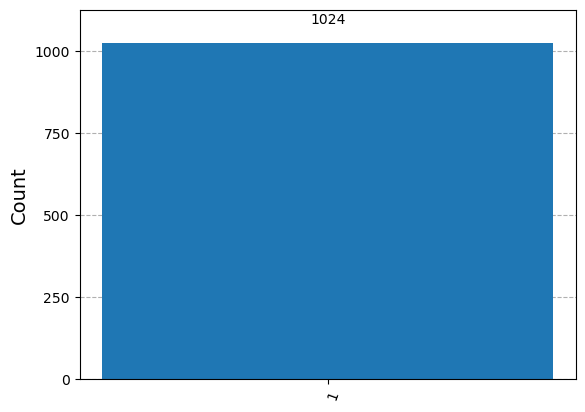

In [76]:
counts = sim.run(qc).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts)  # Display the output on measurement of state vector

We initialized our qubit in the state $|-\rangle$, but we can see that, after the measurement, we have collapsed our qubit to the state $|1\rangle$. If you run the cell again, you will see the same result, since along the X-basis, the state $|-\rangle$ is a basis state and measuring it along X will always yield the same result.


### Quick Exercises
1.	If we initialize our qubit in the state $|+\rangle$, what is the probability of measuring it in state $|-\rangle$?
2.	Use Qiskit to display the probability of measuring a $|0\rangle$ qubit in the states $|+\rangle$ and $|-\rangle$ (**Hint:** you might want to use `.get_counts()` and `plot_histogram()`).
3.	Try to create a function that measures in the Y-basis.



In [77]:
print('Probability for -: ' + str(1-counts['1']/1024))

Probability for -: 0.0


In [78]:
initial_state = [1/sqrt(2), -1/sqrt(2)]
# Initialize our qubit and measure it
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
qc.measure(0, 0)
qc.draw('mpl')

counts = sim.run(qc, shots = 100000).result().get_counts()  # Do the simulation, returning the state vector
print('Probability for +: ' + str(counts['1']/100000))
print('Probability for -: ' + str(counts['0']/100000))

Probability for +: 0.50112
Probability for -: 0.49888


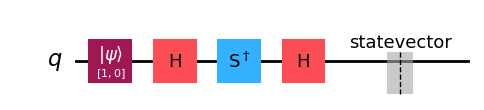

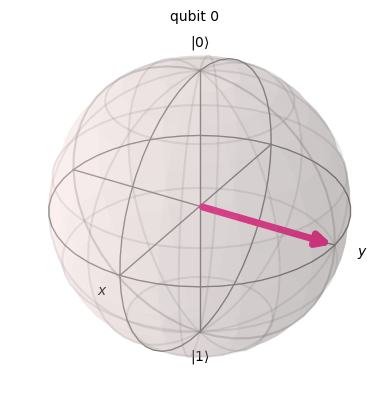

In [79]:
# Create the Y-measurement function:
def y_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the Y-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.sdg(qubit)
    qc.h(qubit)
    qc.measure(qubit, cbit)
    return qc

initial_state = np.array([1,0])
qc = QuantumCircuit(1)
qc.initialize(initial_state, 0)
qc.h(0)
qc.sdg(0)
qc.h(0)
qc.save_statevector()   # Tell simulator to save statevector
display(qc.draw('mpl'))

state = sim.run(qc).result().get_statevector()
display(plot_bloch_multivector(state))


Measuring in different bases allows us to see Heisenberg’s famous uncertainty principle in action. Having certainty of measuring a state in the Z-basis removes all certainty of measuring a specific state in the  X-basis, and vice versa. A common misconception is that the uncertainty is due to the limits in our equipment, but here we can see the uncertainty is actually part of the nature of the qubit. 

For example, if we put our qubit in the state $|0\rangle$, our measurement in the Z-basis is certain to be $|0\rangle$, but our measurement in the X-basis is completely random! Similarly, if we put our qubit in the state $|-\rangle$, our measurement in the X-basis is certain to be $|-\rangle$, but now any measurement in the Z-basis will be completely random.

More generally: _Whatever state our quantum system is in, there is always a measurement that has a deterministic outcome._ 

The introduction of the H-gate has allowed us to explore some interesting phenomena, but we are still very limited in our quantum operations. Let us now introduce a new type of gate:

## 5. The P-gate  <a id="rzgate"></a>

The P-gate (phase gate) is _parametrised,_ that is, it needs a number ($\phi$) to tell it exactly what to do. The P-gate performs a rotation of $\phi$ around the Z-axis direction. It has the matrix form:

$$
P(\phi) = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\phi} \end{bmatrix}
$$

Where $\phi$ is a real number.



In Qiskit, we specify a P-gate using `p(phi, qubit)`:

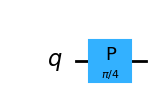

In [80]:
qc = QuantumCircuit(1)
qc.p(pi/4, 0)
qc.draw('mpl')

You may notice that the Z-gate is a special case of the P-gate, with $\phi = \pi$. In fact there are three more commonly referenced gates we will mention in this chapter, all of which are special cases of the P-gate:

## 6. The I, S and T-gates  <a id="istgates"></a>

### 6.1 The I-gate  <a id="igate"></a>

First comes the I-gate (aka ‘Id-gate’ or ‘Identity gate’). This is simply a gate that does nothing. Its matrix is the identity matrix:

$$
I = \begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix}
$$

Applying the identity gate anywhere in your circuit should have no effect on the qubit state, so it’s interesting this is even considered a gate. There are two main reasons behind this, one is that it is often used in calculations, for example: proving the X-gate is its own inverse:

$$ I = XX $$

The second, is that it is often useful when considering real hardware to specify a ‘do-nothing’ or ‘none’ operation.

#### Quick Exercise
1. What are the eigenstates of the I-gate?



### Your solution


### 6.2 The S-gates  <a id="sgate"></a>

The next gate to mention is the S-gate (sometimes known as the $\sqrt{Z}$-gate), this is a P-gate with $\phi = \pi/2$. It does a quarter-turn around the Bloch sphere. It is important to note that unlike every gate introduced in this chapter so far, the S-gate is **not** its own inverse! As a result, you will often see the S<sup>†</sup>-gate, (also “S-dagger”, “Sdg” or $\sqrt{Z}^\dagger$-gate).  The S<sup>†</sup>-gate is clearly an P-gate with $\phi = -\pi/2$:

$$ S = \begin{bmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{2}} \end{bmatrix}, \quad  S^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & e^{-\frac{i\pi}{2}} \end{bmatrix}$$

The name "$\sqrt{Z}$-gate" is due to the fact that two successively applied S-gates has the same effect as one Z-gate:

$$ SS|q\rangle = Z|q\rangle $$

This notation is common throughout quantum computing.

To add an S-gate in Qiskit:

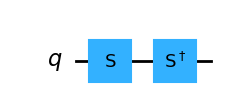

In [81]:
qc = QuantumCircuit(1)
qc.s(0)   # Apply S-gate to qubit 0
qc.sdg(0) # Apply Sdg-gate to qubit 0
qc.draw('mpl')

### 6.3 The T-gate <a id="tgate"></a>
The T-gate is a very commonly used gate, it is a P-gate with $\phi = \pi/4$:

$$ T = \begin{bmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{4}} \end{bmatrix}, \quad  T^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & e^{-\frac{i\pi}{4}} \end{bmatrix}$$

As with the S-gate, the T-gate is sometimes also known as the $\sqrt[4]{Z}$-gate.

In Qiskit:

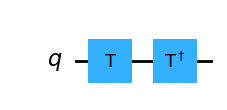

In [82]:
qc = QuantumCircuit(1)
qc.t(0)   # Apply T-gate to qubit 0
qc.tdg(0) # Apply Tdg-gate to qubit 0
qc.draw('mpl')

## 7. The U-gate  <a id="generalU"></a>

As we saw earlier, the I, Z, S & T-gates were all special cases of the more general P-gate. In the same way, the U-gate is the most general of all single-qubit quantum gates. It is a parametrised gate of the form:

$$
U(\theta, \phi, \lambda) = \begin{bmatrix} \cos(\frac{\theta}{2}) & -e^{i\lambda}\sin(\frac{\theta}{2}) \\
            e^{i\phi}\sin(\frac{\theta}{2}) & e^{i(\phi+\lambda)}\cos(\frac{\theta}{2})
     \end{bmatrix}
$$

Every gate in this chapter could be specified as $U(\theta,\phi,\lambda)$, but it is unusual to see this in a circuit diagram, possibly due to the difficulty in reading this.

As an example, we see some specific cases of the U-gate in which it is equivalent to the H-gate and P-gate respectively.

$$
\begin{aligned}
U(\tfrac{\pi}{2}, 0, \pi) = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\
            1 & -1
     \end{bmatrix} = H
& \quad &
U(0, 0, \lambda) = \begin{bmatrix} 1 & 0 \\
            0 & e^{i\lambda}\\
     \end{bmatrix} = P
\end{aligned}
$$

In [167]:
# Let's have U-gate transform a |0> to |+> state
qc = QuantumCircuit(1)
qc.u(pi/2, 0, pi, 0)
qc.draw()

┌────────────┐
q: ┤ U(π/2,0,π) ├
   └────────────┘

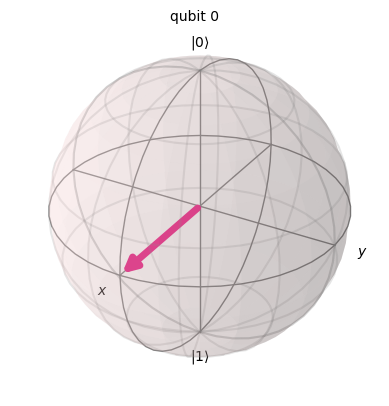

In [168]:
# Let's see the result
qc.save_statevector()
state = sim.run(qc).result().get_statevector()
plot_bloch_multivector(state)

It should be obvious from this that there are an infinite number of possible gates, and that this also includes R<sub>x</sub> and R<sub>y</sub>-gates, although they are not mentioned here. It must also be noted that there is nothing special about the Z-basis, except that it has been selected as the standard computational basis. Qiskit also provides the X equivalent of the S and Sdg-gate i.e. the SX-gate and SXdg-gate respectively. These gates do a quarter-turn with respect to the X-axis around the Bloch sphere and are a special case of the R<sub>x</sub>-gate.


Before running on real IBM quantum hardware, all single-qubit operations are compiled down to $I$ , $X$, $SX$ and $R_{z}$ . For this reason they are sometimes called the _physical gates_.

## 8. Additional resources

You can find a community-created cheat-sheet with some of the common quantum gates, and their properties [here](https://raw.githubusercontent.com/qiskit-community/qiskit-textbook/main/content/ch-states/supplements/single-gates-cheatsheet.pdf).